# 1. 数据准备

In [2]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from factorModel.factorValidator import *
from windHelper import WindHelper
from datetime import *

## 1.2. 获取资产价格时间序列

In [17]:
beginDate = datetime(2006, 1, 1)
endDate = datetime(2017, 8, 22)
para = "close"
df = WindHelper.getMultiTimeSeriesDataFrame(["060E.CS"], beginDate=beginDate, endDate=endDate, para=para)
df = df.dropna()
df.tail()

,060e.cs_close
trade_date,
2017-08-16,174.8687
2017-08-17,174.9140
2017-08-18,174.8482
2017-08-21,174.6511
2017-08-22,174.4612


## 1.2. 获取因子的时间序列

In [18]:
factor_df = WindHelper.getMultiTimeSeriesDataFrame(["M0017126"], beginDate=beginDate, endDate=endDate,
                                                para=para)
factor_df = factor_df.dropna()
factor_df.index = factor_df.index - timedelta(days=0)
%matplotlib inline
import pandas_highcharts
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
display_charts(factor_df.join(df, how="left"), chart_type="stock", secondary_y=factor_df.columns[0],title="测试")

# 2.因子校验

## 2.0 双向校验

In [19]:
config = {"relation":NEGATIVE,"type":UP,"his_count": 12,"std_count":0.5, "period": 1}

In [20]:
report = sharp_ratio_test(df[df.columns[0]], factor_df[factor_df.columns[0]], "e001", config, lag=2, short=False)

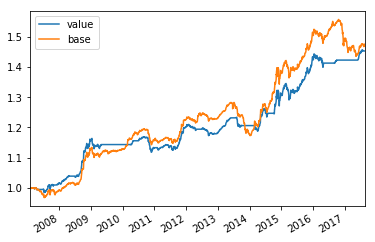

In [21]:
report["ts"][["value","base"]].plot()

## 2.1. e001事件：短期高点

设置因子事件的配置文件

In [44]:
config = {"relation":NEGATIVE,"type":UP,"his_count": 12,"std_count":1.8, "period": 1}

In [45]:
# adjust_factor_series = get_adj_factor_series(df, factor_df, lag=2)
# len(df["060e.cs_close"])
report = perform_after_event(df[df.columns[0]], factor_df[factor_df.columns[0]], "e001", config, lag=1, asset_price=False)

In [47]:
%matplotlib inline
print len(report["ts"])
print report["ts"]["bp"].min()
print report["ts"]["bp"].mean()
print (report["ts"]["bp"] > 0).sum()*1.0/len(report["ts"])
report["ts"]["bp"]

6
-20.38
17.08
0.833333333333


2007-05-08    48.67
2008-05-04     8.84
2012-05-03   -20.38
2013-11-01    28.56
2016-11-01    25.18
2016-12-01    11.61
Name: bp, dtype: float64

In [33]:
factor_df.tail()

,m0017126_close
trade_date,
2017-04-30,51.2
2017-05-31,51.2
2017-06-30,51.7
2017-07-31,51.4
2017-08-31,51.7


In [40]:
e001(adjust_factor_series=factor_df[factor_df.columns[0]],cur_date=datetime(2017,9,9), config=config)

-0.064320885822273577

# 2.2.  e003x2事件(下跌后反转)

In [14]:
config = {
    "relation":NEGATIVE,
    "type":UP,
    "his_count": 3,
    "threshold":0, 
    "threshold2":0,
    "period": 1
}
report2 = perform_after_event(df[df.columns[0]], factor_df[factor_df.columns[0]], "e003x2", config, lag=1, asset_price=False)

In [15]:
%matplotlib inline
print len(report2["ts"])
print report2["ts"]["bp"].min()
print report2["ts"]["bp"].mean()
print (report2["ts"]["bp"] > 0).sum()*1.0/len(report2["ts"])
report2["ts"]["bp"]

8
-23.0
-1.6675
0.5


2006-09-01   -23.00
2007-09-03    13.14
2010-09-01     9.84
2011-04-01    -3.54
2011-09-01   -21.03
2012-10-09    10.63
2014-04-01   -20.52
2015-03-02    21.14
Name: bp, dtype: float64

## 2.3. e003x1事件(上涨后反转)

In [16]:
config = {
    "relation":NEGATIVE,
    "type":DOWN,
    "his_count": 3,
    "threshold":0, 
    "threshold2":0,
    "period": 1
}
report2 = perform_after_event(df[df.columns[0]], factor_df[factor_df.columns[0]], "e003x1", config, lag=1, asset_price=False)

In [19]:
%matplotlib inline
print len(report2["ts"])
print report2["ts"]["bp"].max()
print report2["ts"]["bp"].mean()
print (report2["ts"]["bp"] > 0).sum()*1.0/len(report2["ts"])
report2["ts"]["bp"]

5
37.21
8.428
0.6


2008-06-03    37.21
2009-06-01    16.85
2011-01-04    15.80
2012-06-01    -2.12
2014-09-02   -25.60
Name: bp, dtype: float64

e003系列相对于PMI来说，基本无效

## e002x1事件(连续上涨)

In [28]:
config = {
    "relation":NEGATIVE,
    "type":UP,
    "his_count": 5,
    "threshold":0, 
    "period": 1
}
report2 = perform_after_event(df[df.columns[0]], factor_df[factor_df.columns[0]], "e002x1", config, lag=1, asset_price=False)

In [29]:
%matplotlib inline
print len(report2["ts"])
print report2["ts"]["bp"].min()
print report2["ts"]["bp"].mean()
print (report2["ts"]["bp"] > 0).sum()*1.0/len(report2["ts"])
report2["ts"]["bp"]

4
-20.38
-9.5375
0.0


2009-05-04    -4.77
2009-11-03   -12.21
2012-05-03   -20.38
2014-08-01    -0.79
Name: bp, dtype: float64